In [33]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix

In [15]:
ds=pd.read_csv(r"C:\Users\arunf\Downloads\titanic (3).csv")

In [16]:
ds

,Pclass,Sex,Age,Survived
0,3,male,22.0,0
1,1,female,38.0,1
2,3,female,26.0,1
3,1,female,35.0,1
4,3,male,35.0,0
...,...,...,...,...
886,2,male,27.0,0
887,1,female,19.0,1
888,3,female,NaN,0
889,1,male,26.0,1


In [9]:
le=preprocessing.LabelEncoder()

In [17]:
ds['Sex']=le.fit_transform(ds['Sex'].astype(str))

In [18]:
ds

,Pclass,Sex,Age,Survived
0,3,1,22.0,0
1,1,0,38.0,1
2,3,0,26.0,1
3,1,0,35.0,1
4,3,1,35.0,0
...,...,...,...,...
886,2,1,27.0,0
887,1,0,19.0,1
888,3,0,NaN,0
889,1,1,26.0,1


In [19]:
ds.isnull().sum()

Pclass        0
Sex           0
Age         177
Survived      0
dtype: int64

In [20]:
a=ds['Age'].mean()
a

29.69911764705882

In [21]:
ds['Age']=ds['Age'].fillna(a)

In [22]:
ds.isnull().sum()

Pclass      0
Sex         0
Age         0
Survived    0
dtype: int64

In [27]:
x=ds.drop(['Survived'],1)
y=ds['Survived']

C:\Users\arunf\AppData\Local\Temp\ipykernel_15828\3105817091.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  x=ds.drop(['Survived'],1)


In [28]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=1)

In [29]:
rfc=RFC(n_estimators=100)

In [30]:
rfc.fit(xtrain,ytrain)

RandomForestClassifier()

In [31]:
rfc.score(xtest,ytest)

0.7574626865671642

In [32]:
rfc.predict([[3,1,22]])

C:\Users\arunf\anaconda3\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [34]:
y_actual=ytest
y_pred=rfc.predict(xtest)
cf=confusion_matrix(y_actual,y_pred)

(<Figure size 640x480 with 1 Axes>,
 <AxesSubplot:xlabel='predicted label', ylabel='true label'>)

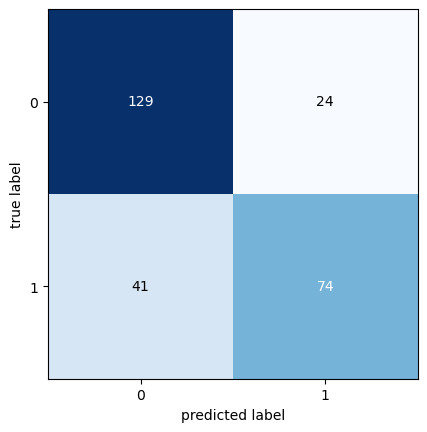

In [36]:
from mlxtend.plotting import plot_confusion_matrix
plot_confusion_matrix(cf)